In [38]:
import os
#數據處理
import pandas as pd
import numpy as np
import random
import sklearn.preprocessing as preprocessing
#可視化
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#機器學習
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings
import scipy
warnings.filterwarnings('ignore')

In [39]:
train = pd.read_csv('/Users/bella/house_price/train.csv')
test = pd.read_csv('/Users/bella/house_price/test.csv')
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [40]:
train.shape

(1460, 81)

In [41]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
train['PoolQC'] = train.PoolQC.fillna('NA')
train['Alley'] = train.Alley.fillna('NA')
train['MiscFeature'] = train.MiscFeature.fillna('NA')
train['Fence'] = train.Fence.fillna('NA')
train['FireplaceQu'] = train.FireplaceQu.fillna('NA')
train['GarageType'] = train.GarageType.fillna('NA')
train['GarageYrBlt'] = train.GarageYrBlt.fillna('NA')
train['GarageFinish'] = train.GarageFinish.fillna('NA')
train['GarageQual'] = train.GarageQual.fillna('NA')
train['GarageCond'] = train.GarageCond.fillna('NA')
train['BsmtQual'] =train.BsmtQual.fillna('NA')
train['BsmtCond'] = train.BsmtCond.fillna('NA')
train['BsmtFinType1'] = train.BsmtFinType1.fillna('NA')
train['BsmtExposure'] = train.BsmtExposure.fillna('NA')
train['BsmtFinType2'] = train.BsmtFinType2.fillna('NA')
train[train.BsmtExposure.isnull()] #ID949有地下室沒有曝光資料跟BsmtFinType2，目前用NA填充
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [42]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

skew 1.8828757597682129


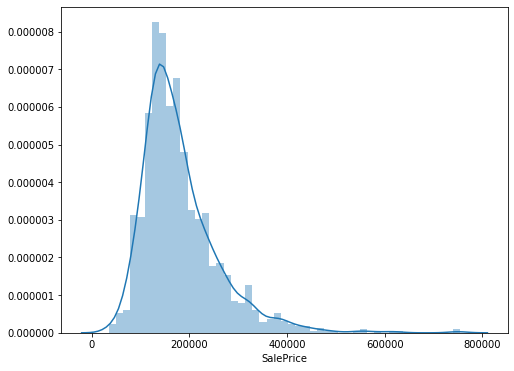

In [43]:
plt.figure(figsize=(8,6))
print("skew" , train.SalePrice.skew())
sns.distplot(train['SalePrice'])

In [44]:
Title =[]
for row in train:
    Title.append(row[0:])
Title.remove(Title[0])

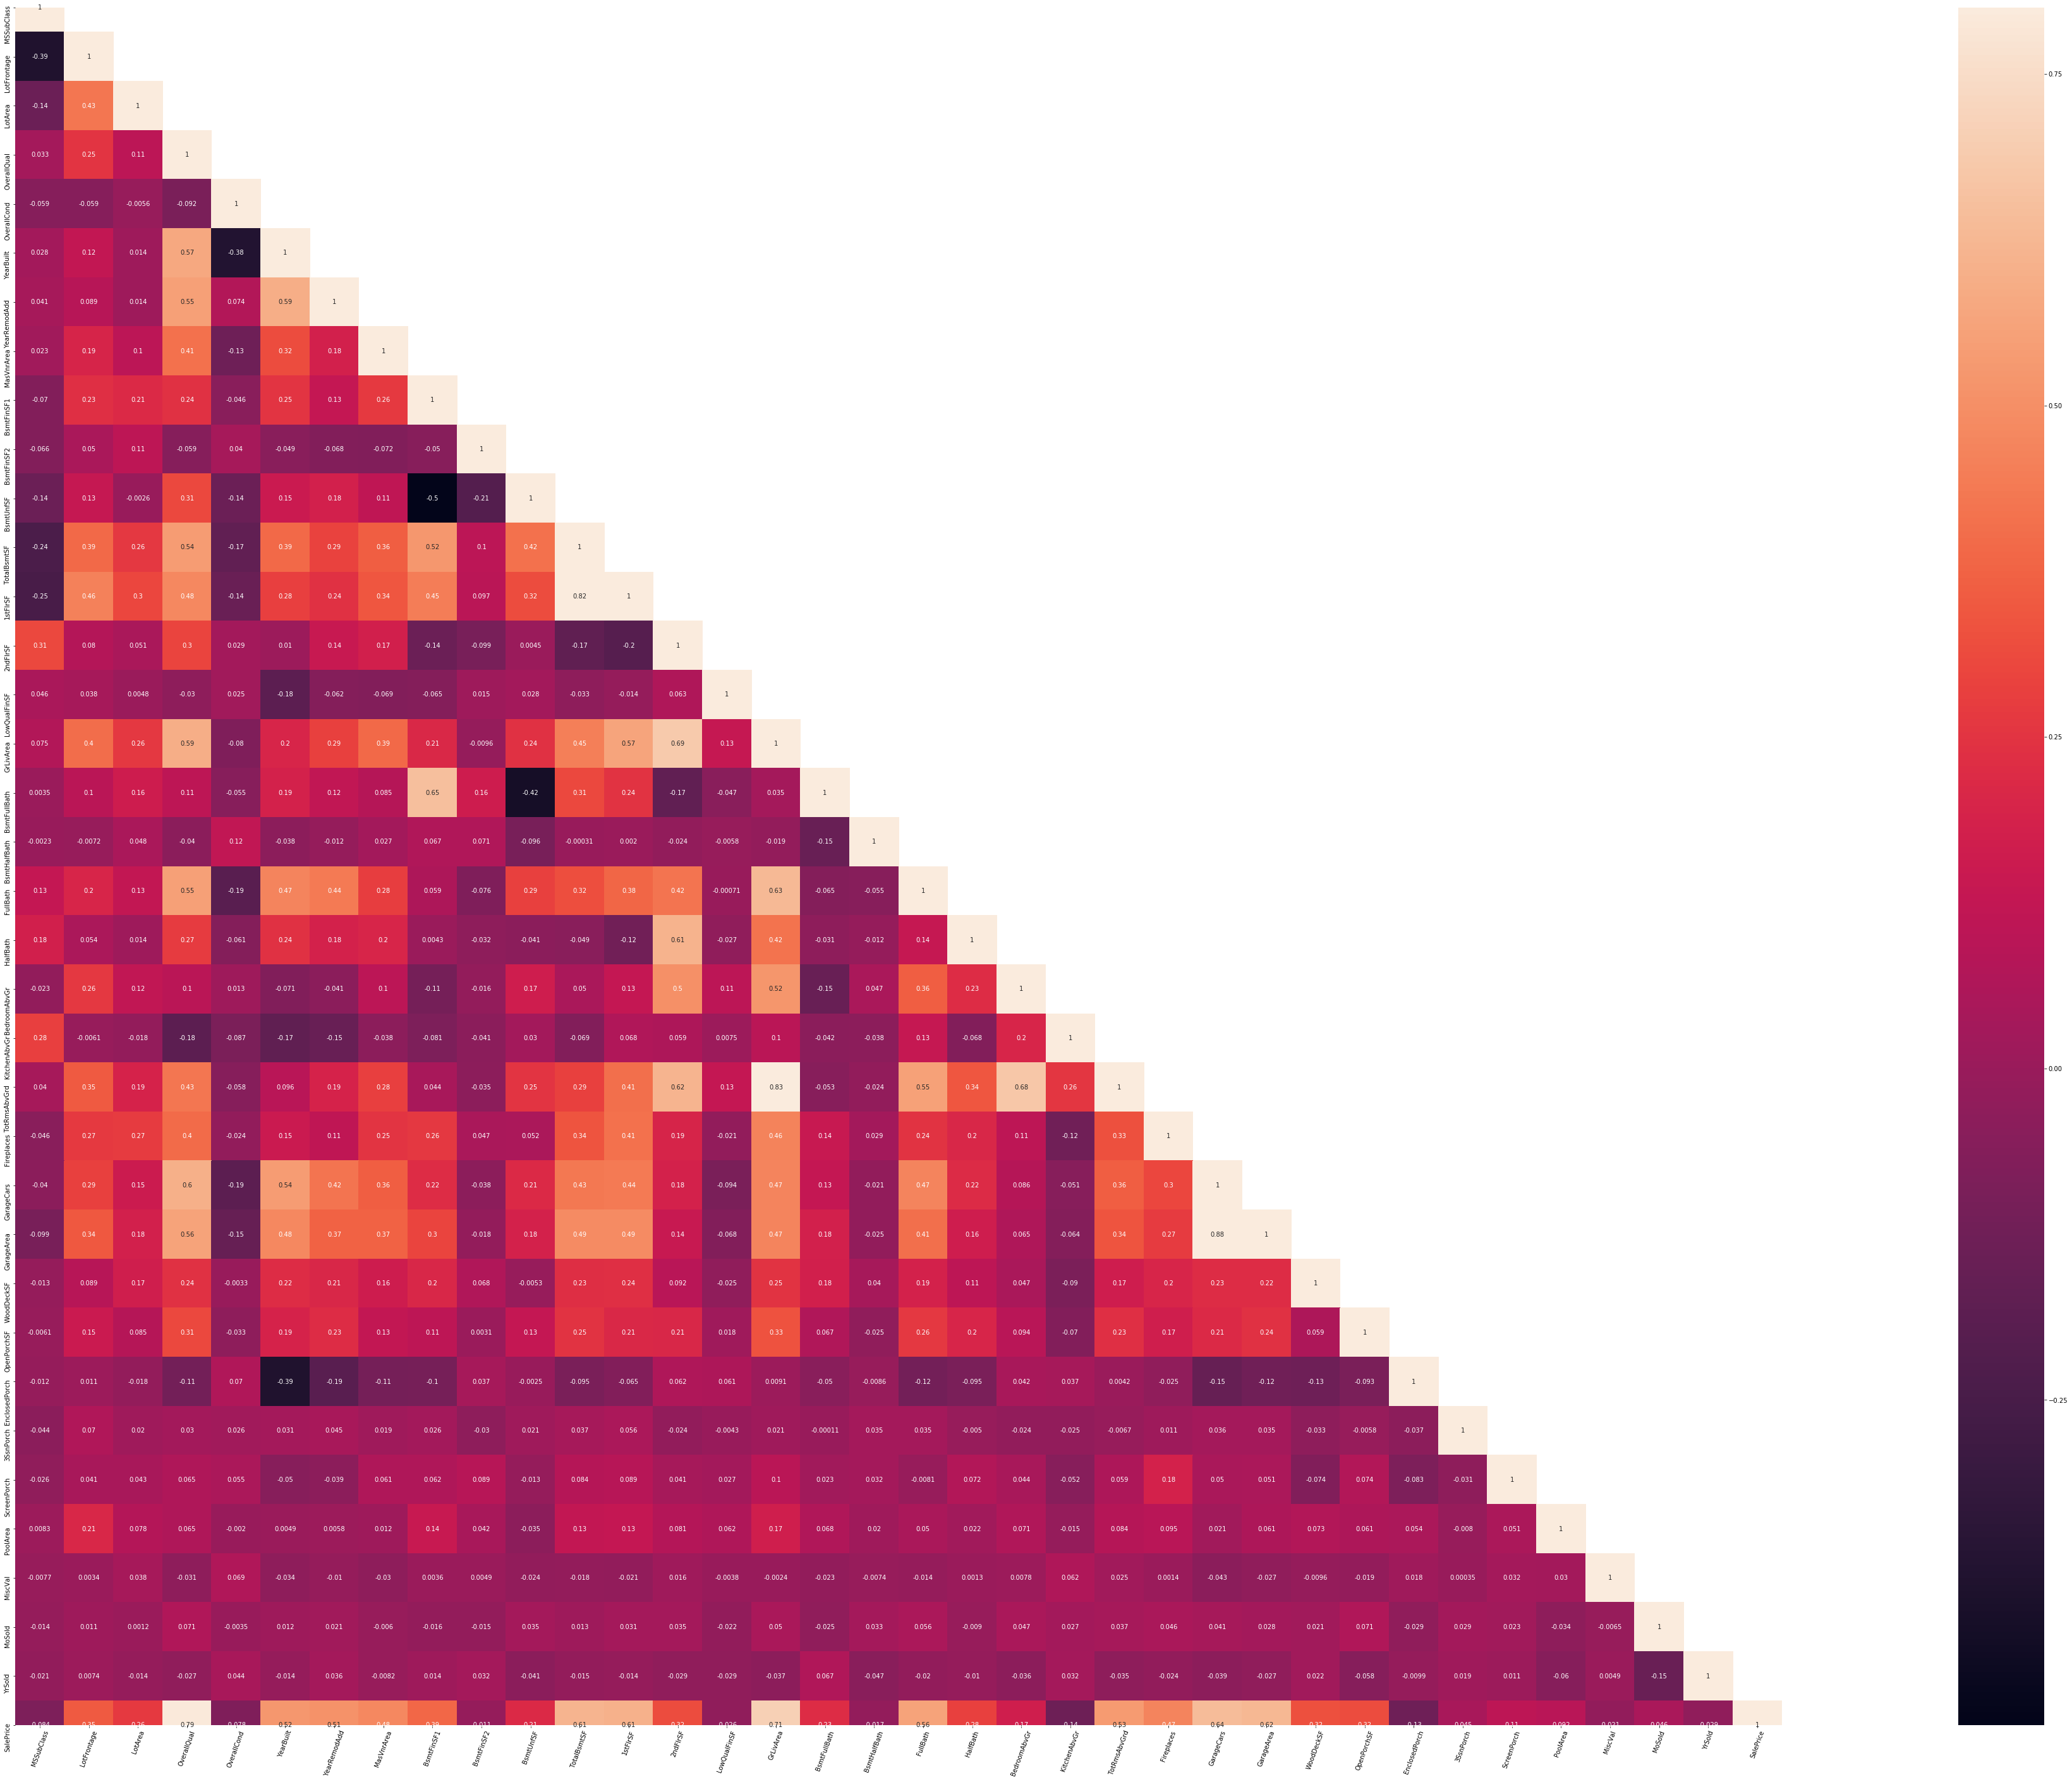

In [45]:
corrMat = train[Title].corr()
mask = np.array(corrMat)
mask[np.tril_indices_from(mask)] = False
plt.subplots(figsize=(100,50))
plt.xticks(rotation=70)

sns.heatmap(corrMat, mask=mask, vmax=.8, square=True, annot=True)

In [28]:
print(corrMat["SalePrice"].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [81]:
feature = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd'
          , 'YearBuilt' , 'YearRemodAdd', 'MasVnrArea' , 'Fireplaces' , 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF'
           , '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF']

In [68]:
X = train[feature]
y = np.log(train['SalePrice'])

print(X.shape, y.shape)
print(train[feature])

(1460, 19) (1460,)
      OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0               7       1710           2         548          856       856   
1               6       1262           2         460         1262      1262   
2               7       1786           2         608          920       920   
3               7       1717           3         642          756       961   
4               8       2198           3         836         1145      1145   
5               5       1362           2         480          796       796   
6               8       1694           2         636         1686      1694   
7               7       2090           2         484         1107      1107   
8               7       1774           2         468          952      1022   
9               5       1077           1         205          991      1077   
10              5       1040           1         384         1040      1040   
11              9       2324     

In [74]:
from sklearn.preprocessing import MinMaxScaler
#特徵預處理
X_copy = X[:]
scaler = MinMaxScaler()
X_transformed = scaler.fit_transform(X_copy)
X_transformed = np.around(X_transformed, decimals=10)
print(X_transformed)

[[0.66666667 0.25923135 0.5        ... 0.0334198  0.33333333 0.06421233]
 [0.55555556 0.17483044 0.5        ... 0.03879502 0.         0.12157534]
 [0.66666667 0.27354936 0.5        ... 0.04650728 0.33333333 0.18578767]
 ...
 [0.66666667 0.37792012 0.25       ... 0.03618687 0.         0.37542808]
 [0.44444444 0.14016579 0.25       ... 0.03934189 0.33333333 0.        ]
 [0.44444444 0.17370008 0.25       ... 0.04037019 0.33333333 0.05821918]]


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, random_state=1, test_size=.2)

In [76]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
model.score(X_test,y_test)
print ('R^2 is: \n', model.score(X_test,y_test))

R^2 is: 
 0.8688948076125466


In [80]:
base_line_model = LogisticRegression(solver='liblinear')
param = {'penalty':['l1', 'l2'],
        'C':[0.1, 0.5, 1.0, 5.0]}
grd = GridSearchCV(estimator=base_line_model, param_grid=param, cv=5, n_jobs=3)
grd.fit(X_train, y_train)


ValueError: Unknown label type: 'continuous'